# NBA Players Stats 23/24

### Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

print('Done.')

Done.


### Loading the Data

In [2]:
nba_stats_data = pd.read_csv('/home/bree/Documents/nba-player-data.csv')

nba_stats_data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [3]:
nba_stats_data.shape

(736, 30)

In [4]:
nba_stats_data.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        8
3P         0
3PA        0
3P%       46
2P         0
2PA        0
2P%       13
eFG%       8
FT         0
FTA        0
FT%       59
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [5]:
nba_stats_data.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [6]:
columns = ['3P%', '2P%', 'FT%', 'eFG%','FG%']

for column in columns:
    nba_stats_data[column] = pd.to_numeric(nba_stats_data[column], errors='coerce')

for column in columns:
    nba_stats_data[column].fillna(nba_stats_data[column].mean())

print('Done')

Done


In [7]:
nba_stats_data.isnull()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
732,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
734,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
nba_stats_data.describe()

,FG%,3P%,2P%,eFG%,FT%
count,727.000000,689.000000,722.000000,727.000000,676.00000
mean,0.447558,0.316925,0.519686,0.515692,0.74967
std,0.110701,0.137217,0.136813,0.114737,0.16003
min,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.400000,0.280000,0.478250,0.483000,0.68550
50%,0.446000,0.346000,0.530000,0.529000,0.77700
75%,0.500000,0.385000,0.581000,0.575000,0.84025
max,0.800000,1.000000,1.000000,0.917000,1.00000


### Selecting the features

In [9]:
 # Select only numeric columns
numeric_columns = nba_stats_data.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

# Create X with only numeric columns
X = nba_stats_data[numeric_columns]


Index(['FG%', '3P%', '2P%', 'eFG%', 'FT%'], dtype='object')


### Standardize

In [18]:
# Apply the StandardScaler to the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Check if any missing values exist in the scaled data
print(f"Missing values in scaled data: {np.isnan(X_scaled).sum()}")

Missing values in scaled data: 139


### Impute missing values by filling them with the mean of the column

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

np.isnan(X_scaled_imputed).sum()

np.int64(0)

### Apply PCA

In [38]:
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled_imputed)


explained_variance = pca.explained_variance_ratio_ 
print(f'Explained Variance: {explained_variance}')

PCA(n_components=0.99)
Explained Variance: [0.53228346 0.24077864 0.16247285 0.05351329 0.01095175]


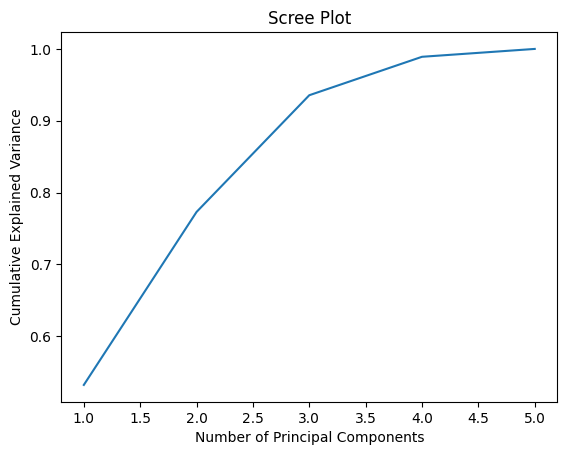

In [36]:
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

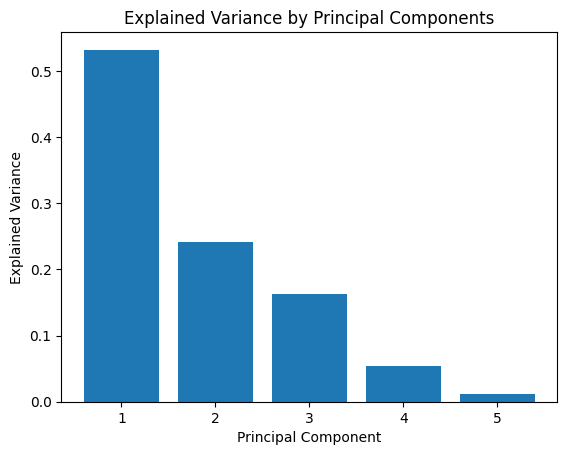

In [37]:
# Plot explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()
